In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [3]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
num_duplicates = train.duplicated().sum()
num_duplicates

0

In [5]:
num_duplicates_PassengerId = train['PassengerId'].duplicated().sum()
num_duplicates_PassengerId

0

In [6]:
num_duplicates_Ticket = train['Ticket'].duplicated().sum()
num_duplicates_Ticket

210

In [7]:
num_rows=train.count()
num_rows

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test=pd.read_csv("/kaggle/input/titanic/test.csv")
test.shape

(418, 11)

In [10]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [12]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Just two nulls, i will replace it with the mode

In [13]:
train['Embarked'] = train['Embarked'].fillna('S')# S is the mode
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [14]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [15]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [16]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

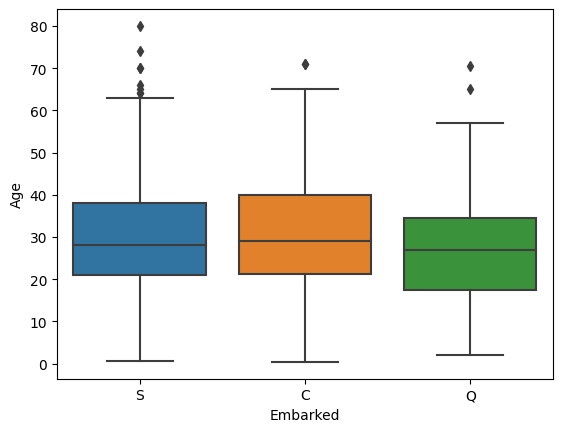

In [17]:
sns.boxplot(x='Embarked', y='Age', data=train)
plt.show()

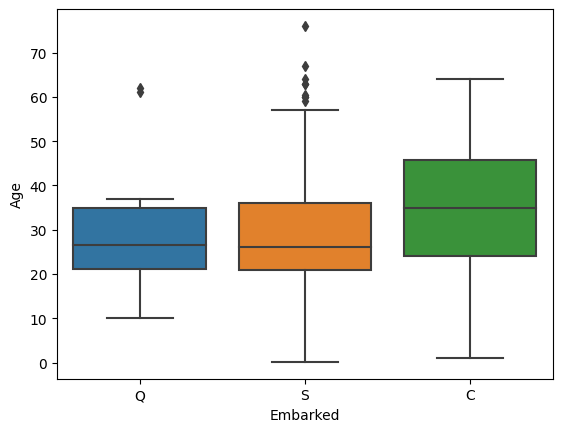

In [18]:
sns.boxplot(x='Embarked', y='Age', data=test)
plt.show()

In [19]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data isn't balanced

# Data Preprocessing

Many cabin nulls in train and test data, so i will drop it.

In [20]:
train=train[sorted(train.columns)]
test=test[sorted(test.columns)]

In [21]:
train.drop(axis=1,columns=['Name','Ticket','Cabin'],inplace=True)
train.set_index('PassengerId',inplace=True)

In [22]:
test.drop(axis=1,columns=['Name','Ticket','Cabin'],inplace=True)
test.set_index('PassengerId',inplace=True)

In [23]:
train.head(20)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
PassengerId,,,,,,,,
1,22.0,S,7.2500,0,3,male,1,0
2,38.0,C,71.2833,0,1,female,1,1
3,26.0,S,7.9250,0,3,female,0,1
4,35.0,S,53.1000,0,1,female,1,1
5,35.0,S,8.0500,0,3,male,0,0
6,NaN,Q,8.4583,0,3,male,0,0
7,54.0,S,51.8625,0,1,male,0,0
8,2.0,S,21.0750,1,3,male,3,0
9,27.0,S,11.1333,2,3,female,0,1


In [24]:
train = pd.get_dummies(train, columns=['Embarked'], dtype='int')
train=pd.get_dummies(train,columns=['Sex'], dtype='int')

In [25]:
test = pd.get_dummies(test, columns=['Embarked'], dtype='int')
test=pd.get_dummies(test,columns=['Sex'], dtype='int')

In [26]:
train.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,22.0,7.2500,0,3,1,0,0,0,1,0,1
2,38.0,71.2833,0,1,1,1,1,0,0,1,0
3,26.0,7.9250,0,3,0,1,0,0,1,1,0
4,35.0,53.1000,0,1,1,1,0,0,1,1,0
5,35.0,8.0500,0,3,0,0,0,0,1,0,1


In [27]:
test.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,
892,34.5,7.8292,0,3,0,0,1,0,0,1
893,47.0,7.0000,0,3,1,0,0,1,1,0
894,62.0,9.6875,0,2,0,0,1,0,0,1
895,27.0,8.6625,0,3,0,0,0,1,0,1
896,22.0,12.2875,1,3,1,0,0,1,1,0


In [28]:
train.isna().sum()

Age           177
Fare            0
Parch           0
Pclass          0
SibSp           0
Survived        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Sex_female      0
Sex_male        0
dtype: int64

In [29]:
train.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,22.0,7.2500,0,3,1,0,0,0,1,0,1
2,38.0,71.2833,0,1,1,1,1,0,0,1,0
3,26.0,7.9250,0,3,0,1,0,0,1,1,0
4,35.0,53.1000,0,1,1,1,0,0,1,1,0
5,35.0,8.0500,0,3,0,0,0,0,1,0,1


In [30]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

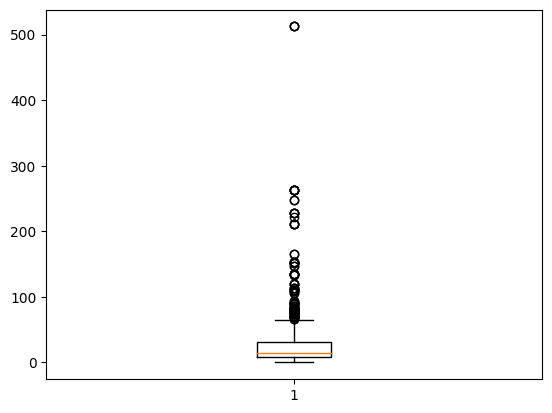

In [31]:
plt.boxplot(train['Fare'])
plt.show()

In [32]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = train[(train['Fare'] < Q1 - 1.5 * IQR) | (train['Fare'] > Q3 + 1.5 * IQR)]
outliers.shape[0]

116

In [33]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(train['Survived'], train['Fare'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.2573065223849624
P-value: 6.120189341924608e-15


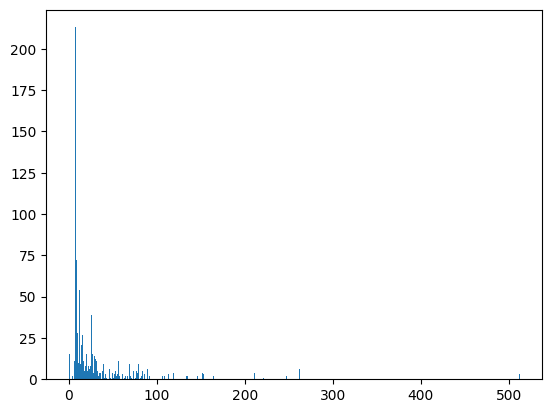

In [34]:
plt.hist(train['Fare'],bins=int(train['Fare'].max()-train['Fare'].min()))
plt.show()

In [35]:
train['Fare']+=0.0001
train['Fare']=np.log(train['Fare'])

In [36]:
test['Fare']+=0.0001
test['Fare']=np.log(test['Fare'])

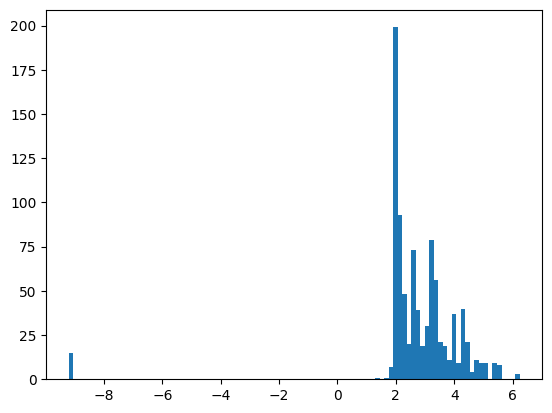

In [37]:
plt.hist(train['Fare'],bins=100)
plt.show()

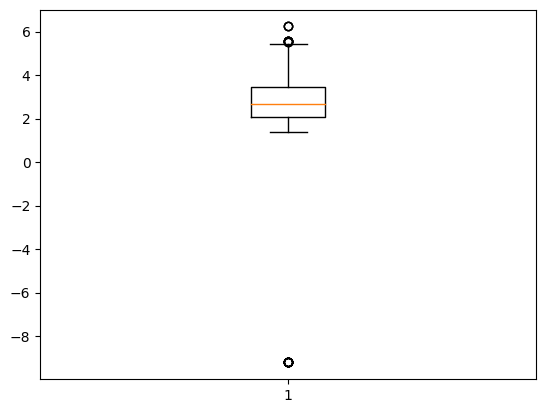

In [38]:
plt.boxplot(train['Fare'])
plt.show()

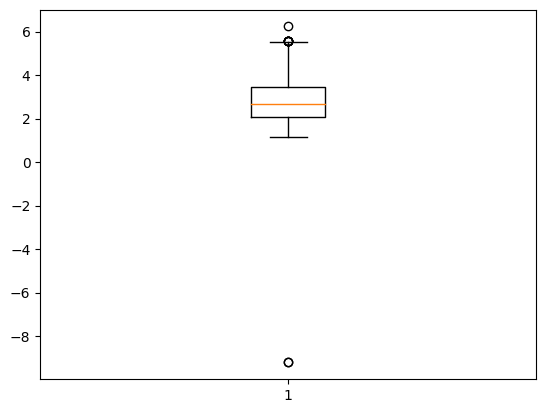

In [39]:
plt.boxplot(test['Fare'])
plt.show()

In [40]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = train[(train['Fare'] < Q1 - 1.5 * IQR) | (train['Fare'] > Q3 + 1.5 * IQR)]
outliers.shape[0]

26

In [41]:
train['Fare'] = np.where(train['Fare'] > Q3 + 1.5 * IQR, Q3 + 1.5 * IQR, train['Fare'])
train['Fare'] = np.where(train['Fare'] < Q1 - 1.5 * IQR, Q1 - 1.5 * IQR, train['Fare'])

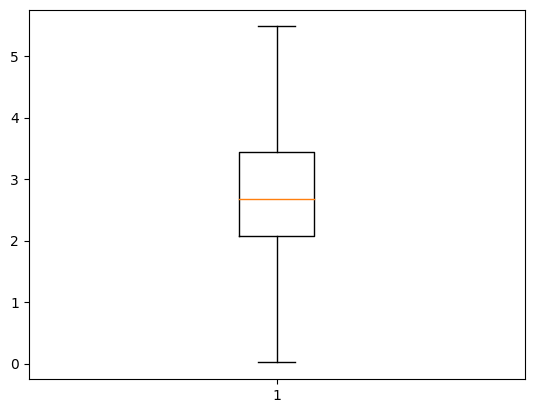

In [42]:
plt.boxplot(train['Fare'])
plt.show()

In [43]:
Q1 = test['Fare'].quantile(0.25)
Q3 = test['Fare'].quantile(0.75)
IQR = Q3 - Q1
test['Fare'] = np.where(test['Fare'] > Q3 + 1.5 * IQR, Q3 + 1.5 * IQR, test['Fare'])
test['Fare'] = np.where(test['Fare'] < Q1 - 1.5 * IQR, Q1 - 1.5 * IQR, test['Fare'])

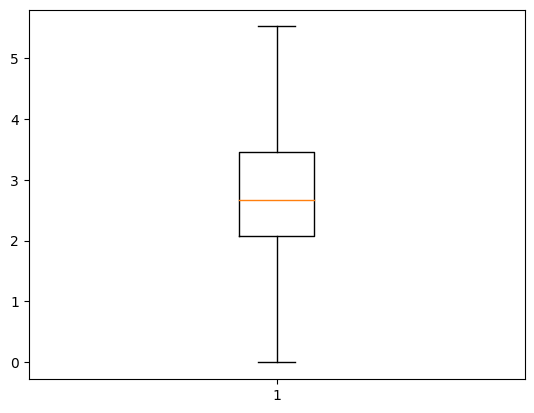

In [44]:
plt.boxplot(test['Fare'])
plt.show()

In [45]:
print(train['Age'].min())
print(train['Age'].max())

0.42
80.0


In [46]:
print(test['Age'].min())
print(test['Age'].max())

0.17
76.0


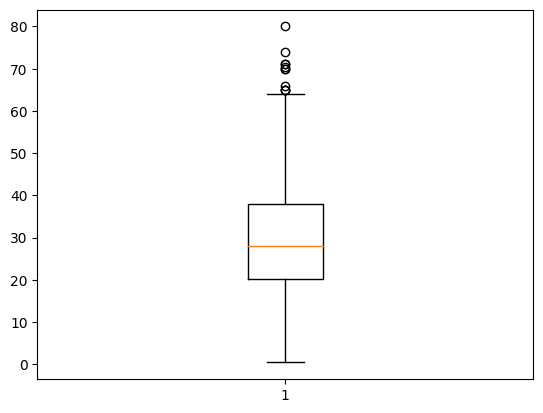

In [47]:
plt.boxplot(train[train['Age'].notna()]['Age'])
plt.show()

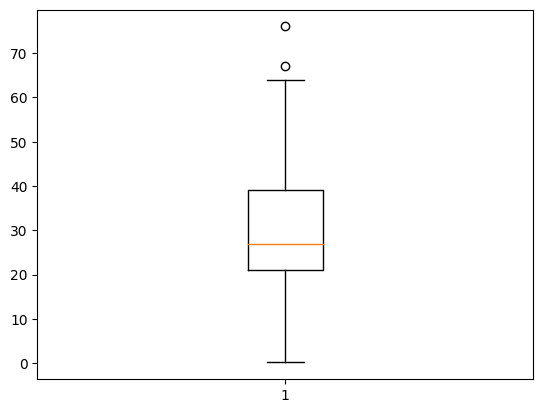

In [48]:
plt.boxplot(test[test['Age'].notna()]['Age'])
plt.show()

In [49]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train['Age'].quantile(0.25)
Q3 = train['Age'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train[ (train['Age'] < lower_bound) |(train['Age'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"The number of outliers in the Age column is: {num_outliers}")

The number of outliers in the Age column is: 11


In [50]:
train['Age'] = np.where(train['Age'] > upper_bound, upper_bound, train['Age'])
test['Age'] = np.where(test['Age'] > upper_bound, upper_bound, test['Age'])

In [51]:
# Identify outliers
outliers = train[ (train['Age'] < lower_bound) |(train['Age'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"The number of outliers in the Age column is: {num_outliers}")

The number of outliers in the Age column is: 0


# Age's Nulls

In [52]:
train[train['Age'].notna()].shape

(714, 11)

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial Regression
def polynomial_regression(degree):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Filter out rows with null values in any of the specified columns
train_clean = train.dropna()
test_clean = test.dropna()

# Separate features and target variable
X_train = train_clean.drop(['Age','Survived'],axis=1)
y_train = train_clean['Age']

X_test = test_clean.drop('Age',axis=1)
y_test = test_clean['Age']

# Initialize regression models with and without regularization
models = {
    'Linear Regression': LinearRegression(),
    
    
    # SGD Regressor
    'SGD Regressor': SGDRegressor(),
    'SGD Regressor LR': SGDRegressor(learning_rate='adaptive'),
    
    # Decision Tree Models
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Regularized Decision Tree Regressor': DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5),
    
    # Random Forest Models
    'Random Forest Regressor': RandomForestRegressor(),
    'Regularized Random Forest Regressor': RandomForestRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5),
    
    # Gradient Boosting Models
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Regularized Gradient Boosting Regressor': GradientBoostingRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=5, subsample=0.8, learning_rate=0.1),
    
    # Support Vector Regressor
    'Support Vector Regressor': SVR(),
    'Support Vector Regressor Degree': SVR(degree=100),
    
    # K-Nearest Neighbors
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'K-Nearest Neighbors n=9': KNeighborsRegressor(n_neighbors=9),
    
    # Polynomial Regression
    'Polynomial Regression (degree 2)': polynomial_regression(2),
    'Polynomial Regression (degree 3)': polynomial_regression(3)
}

# Train, predict, and calculate MAE for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate Mean Absolute Error
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    print(f'{name} Train MAE: {mae_train:.2f}')
    print(f'{name} Test MAE: {mae_test:.2f}\n')


Linear Regression Train MAE: 9.81
Linear Regression Test MAE: 9.88

SGD Regressor Train MAE: 10.00
SGD Regressor Test MAE: 10.07

SGD Regressor LR Train MAE: 9.80
SGD Regressor LR Test MAE: 9.88

Decision Tree Regressor Train MAE: 4.19
Decision Tree Regressor Test MAE: 10.93

Regularized Decision Tree Regressor Train MAE: 8.84
Regularized Decision Tree Regressor Test MAE: 9.53

Random Forest Regressor Train MAE: 5.88
Random Forest Regressor Test MAE: 9.85

Regularized Random Forest Regressor Train MAE: 8.05
Regularized Random Forest Regressor Test MAE: 9.55

Gradient Boosting Regressor Train MAE: 8.03
Gradient Boosting Regressor Test MAE: 9.36

Regularized Gradient Boosting Regressor Train MAE: 8.17
Regularized Gradient Boosting Regressor Test MAE: 9.35

Support Vector Regressor Train MAE: 9.58
Support Vector Regressor Test MAE: 9.56

Support Vector Regressor Degree Train MAE: 9.58
Support Vector Regressor Degree Test MAE: 9.56

K-Nearest Neighbors Train MAE: 8.23
K-Nearest Neighbors T

In [54]:
# from sklearn.model_selection import GridSearchCV


# # Define the parameter grids for each model
# param_grids = {
#     'Linear Regression': {},
    
#     'SGD Regressor': {
#         'alpha': [0.0001, 0.001, 0.01],
#         'learning_rate': ['constant', 'adaptive']
#     },
    
#     'Decision Tree Regressor': {
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10]
#     },
    
#     'Random Forest Regressor': {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10]
#     },
    
#     'Gradient Boosting Regressor': {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [3, 5, 7],
#         'learning_rate': [0.01, 0.1, 0.2]
#     },
    
#     'Support Vector Regressor': {
#         'C': [0.01, 0.1, 1, 10],
#         'kernel': ['linear', 'rbf'],
#         'gamma': ['scale', 'auto']  # Only used for 'rbf' kernel
#     },
    
#     'K-Nearest Neighbors': {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance']
#     },
    
#     'Polynomial Regression': {
#         'polynomialfeatures__degree': [2, 3]
#     }
# }

# # Initialize grid search for each model
# for name, model in models.items():
#     if name == 'Polynomial Regression (degree 2)' or name == 'Polynomial Regression (degree 3)':
#         param_grid = param_grids['Polynomial Regression']
#     else:
#         param_grid = param_grids.get(name, {})
    
#     if param_grid:  # Skip grid search for models with no hyperparameters
#         grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
#         grid_search.fit(X_train, y_train)
        
#         # Get the best model and parameters
#         best_model = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#     else:
#         best_model = model
#         best_params = None
#         best_model.fit(X_train, y_train)
    
#     # Predictions
#     y_train_pred = best_model.predict(X_train)
#     y_test_pred = best_model.predict(X_test)
    
#     # Calculate Mean Absolute Error
#     mae_train = mean_absolute_error(y_train, y_train_pred)
#     mae_test = mean_absolute_error(y_test, y_test_pred)
    
#     print(f'{name} Train MAE: {mae_train:.2f}')
#     print(f'{name} Test MAE: {mae_test:.2f}')
#     if best_params:
#         print(f'Best Parameters: {best_params}\n')
#     else:
#         print('No grid search performed for this model.\n')
        
#     -------------------------------------------------------
    
#     Linear Regression Train MAE: 9.81
# Linear Regression Test MAE: 9.88
# No grid search performed for this model.

# SGD Regressor Train MAE: 9.81
# SGD Regressor Test MAE: 9.88
# Best Parameters: {'alpha': 0.01, 'learning_rate': 'adaptive'}

# SGD Regressor LR Train MAE: 9.80
# SGD Regressor LR Test MAE: 9.88
# No grid search performed for this model.

# Decision Tree Regressor Train MAE: 7.10
# Decision Tree Regressor Test MAE: 10.09
# Best Parameters: {'max_depth': None, 'min_samples_split': 10}

# Regularized Decision Tree Regressor Train MAE: 8.84
# Regularized Decision Tree Regressor Test MAE: 9.57
# No grid search performed for this model.

# Random Forest Regressor Train MAE: 7.54
# Random Forest Regressor Test MAE: 9.46
# Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

# Regularized Random Forest Regressor Train MAE: 8.06
# Regularized Random Forest Regressor Test MAE: 9.61
# No grid search performed for this model.

# Gradient Boosting Regressor Train MAE: 8.47
# Gradient Boosting Regressor Test MAE: 9.23
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

# Regularized Gradient Boosting Regressor Train MAE: 8.18
# Regularized Gradient Boosting Regressor Test MAE: 9.48
# No grid search performed for this model.

# Support Vector Regressor Train MAE: 9.01
# Support Vector Regressor Test MAE: 9.26
# Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

# Support Vector Regressor Degree Train MAE: 9.58
# Support Vector Regressor Degree Test MAE: 9.56
# No grid search performed for this model.

# K-Nearest Neighbors Train MAE: 8.66
# K-Nearest Neighbors Test MAE: 9.97
# Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}

# K-Nearest Neighbors n=9 Train MAE: 8.66
# K-Nearest Neighbors n=9 Test MAE: 9.97
# No grid search performed for this model.

# Polynomial Regression (degree 2) Train MAE: 9.35
# Polynomial Regression (degree 2) Test MAE: 9.77
# Best Parameters: {'polynomialfeatures__degree': 2}

# Polynomial Regression (degree 3) Train MAE: 9.35
# Polynomial Regression (degree 3) Test MAE: 9.77
# Best Parameters: {'polynomialfeatures__degree': 2}

In [55]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you already have X_train, y_train, X_test, y_test defined

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model with MAE loss
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history =model.fit(X_train_scaled, y_train, epochs=30, batch_size=2, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")



Epoch 1/30
286/286 [==============================] - 2s 3ms/step - loss: 17.6232 - val_loss: 10.0435
Epoch 2/30
286/286 [==============================] - 1s 2ms/step - loss: 9.8394 - val_loss: 9.9327
Epoch 3/30
286/286 [==============================] - 1s 2ms/step - loss: 9.6129 - val_loss: 9.8252
Epoch 4/30
286/286 [==============================] - 1s 2ms/step - loss: 9.4031 - val_loss: 9.8724
Epoch 5/30
286/286 [==============================] - 1s 2ms/step - loss: 9.4192 - val_loss: 9.8180
Epoch 6/30
286/286 [==============================] - 1s 2ms/step - loss: 9.2771 - val_loss: 9.7658
Epoch 7/30
286/286 [==============================] - 1s 2ms/step - loss: 9.2810 - val_loss: 9.7945
Epoch 8/30
286/286 [==============================] - 1s 2ms/step - loss: 9.2516 - val_loss: 9.7264
Epoch 9/30
286/286 [==============================] - 1s 2ms/step - loss: 9.2691 - val_loss: 9.8367
Epoch 10/30
286/286 [==============================] - 1s 2ms/step - loss: 9.1402 - val_loss: 9.74

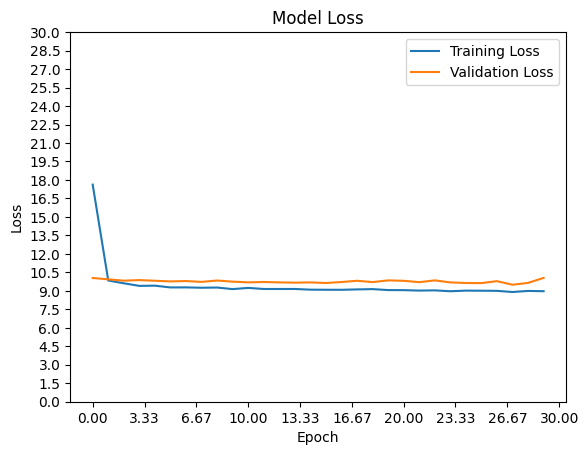

In [56]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.xticks(np.linspace(0, 30, 10))
plt.yticks(np.linspace(0, 30, 21))
plt.show()

Gradient Boosting Regressor wiht {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50} is the best.

In [57]:
X_train=pd.concat([X_train,X_test],axis=0)
y_train=pd.concat([y_train,y_test],axis=0)

Concat all rows that contains age to train the model.indices = X_test.index.tolist()

In [58]:
df=pd.concat([train.drop("Survived",axis=1),test],axis=0)

In [59]:
df.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,
1,22.0,1.981015,0,3,1,0,0,1,0,1
2,38.0,4.266663,0,1,1,1,0,0,1,0
3,26.0,2.070035,0,3,0,0,0,1,1,0
4,35.0,3.972179,0,1,1,0,0,1,1,0
5,35.0,2.085685,0,3,0,0,0,1,0,1


In [60]:
# Select rows with null values in any feature
rows_with_nulls = df[df.isnull().any(axis=1)]

# Create the data DataFrame without the 'Age' column
X_test = rows_with_nulls.drop(columns=['Age'])

# Create the target Series containing 'Age' values from rows with nulls
y_test = rows_with_nulls['Age']

In [61]:
X_test.head()

,Fare,Parch,Pclass,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,
6,2.135160,0,3,0,0,1,0,0,1
18,2.564957,0,2,0,0,0,1,0,1
20,1.977561,0,3,0,1,0,0,1,0
27,1.977561,0,3,0,1,0,0,0,1
29,2.064239,0,3,0,0,1,0,1,0


In [62]:
y_test.head()

PassengerId
6    NaN
18   NaN
20   NaN
27   NaN
29   NaN
Name: Age, dtype: float64

In [63]:
X_test.shape

(263, 9)

In [64]:
X_train=X_train[sorted(X_train.columns)]
X_test=X_test[sorted(X_test.columns)]
X_test.head()

,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp
PassengerId,,,,,,,,,
6,0,1,0,2.135160,0,3,0,1,0
18,0,0,1,2.564957,0,2,0,1,0
20,1,0,0,1.977561,0,3,1,0,0
27,1,0,0,1.977561,0,3,0,1,0
29,0,1,0,2.064239,0,3,1,0,0


In [65]:
regressor =GradientBoostingRegressor(learning_rate= 0.1,max_depth= 3,n_estimators= 50)
regressor.fit(X_train, y_train)
y_predict=regressor.predict(X_test)

In [66]:
y_predict[0:5]

array([28.76975291, 32.70671505, 25.36064079, 27.3180035 , 25.64472825])

In [67]:
indices = X_test.index.tolist()

In [68]:
for index, age in zip(indices, y_predict):
        df.at[index, 'Age'] = age

In [69]:
df.loc[indices]

,Age,Fare,Parch,Pclass,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,
6,28.769753,2.135160,0,3,0,0,1,0,0,1
18,32.706715,2.564957,0,2,0,0,0,1,0,1
20,25.360641,1.977561,0,3,0,1,0,0,1,0
27,27.318003,1.977561,0,3,0,1,0,0,0,1
29,25.644728,2.064239,0,3,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1300,25.758230,2.043931,0,3,0,0,1,0,1,0
1302,26.809101,2.047706,0,3,0,0,1,0,1,0
1305,27.901037,2.085685,0,3,0,0,0,1,0,1


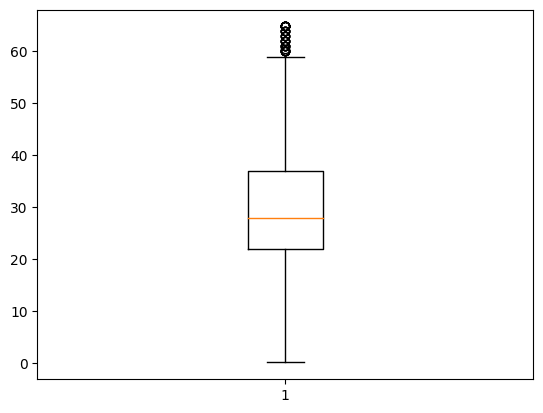

In [70]:
plt.boxplot(df['Age'])
plt.show()

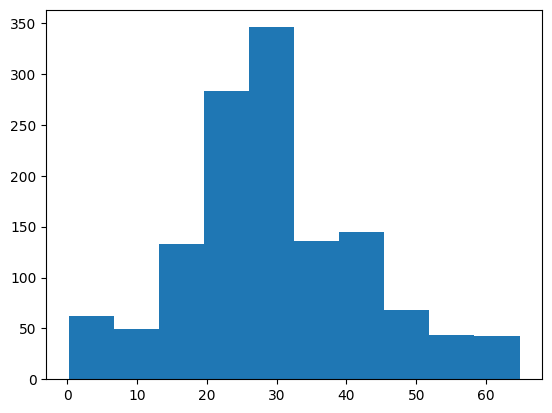

In [71]:
plt.hist(df['Age'])
plt.show()

In [72]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
outliers.shape[0]

40

In [73]:
df['Age'] = np.where(df['Age'] > Q3 + 1.5 * IQR, Q3 + 1.5 * IQR, df['Age'])
df['Age'] = np.where(df['Age'] < Q1 - 1.5 * IQR, Q1 - 1.5 * IQR, df['Age'])

In [74]:
mean = df['Age'].mean()
std_dev = df['Age'].std()

# Normalize the 'Age' column
df['Age'] = (df['Age'] - mean) / std_dev

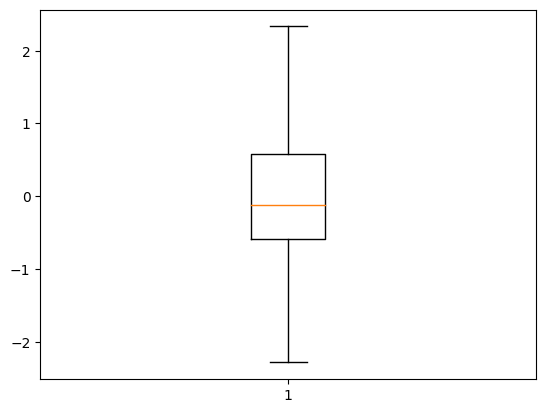

In [75]:
plt.boxplot(df['Age'])
plt.show()

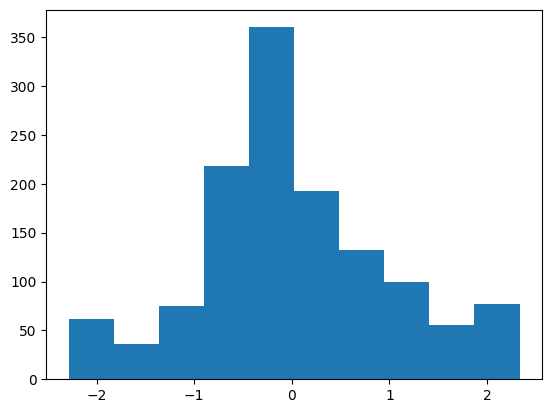

In [76]:
plt.hist(df['Age'])
plt.show()

In [77]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
outliers.shape[0]

0

In [78]:
df.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,
1,-0.586092,1.981015,0,3,1,0,0,1,0,1
2,0.659387,4.266663,0,1,1,1,0,0,1,0
3,-0.274722,2.070035,0,3,0,0,0,1,1,0
4,0.425860,3.972179,0,1,1,0,0,1,1,0
5,0.425860,2.085685,0,3,0,0,0,1,0,1


In [79]:
df.shape

(1309, 10)

In [80]:
train

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,22.0,1.981015,0,3,1,0,0,0,1,0,1
2,38.0,4.266663,0,1,1,1,1,0,0,1,0
3,26.0,2.070035,0,3,0,1,0,0,1,1,0
4,35.0,3.972179,0,1,1,1,0,0,1,1,0
5,35.0,2.085685,0,3,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,2.564957,0,2,0,0,0,0,1,0,1
888,19.0,3.401201,0,1,0,1,0,0,1,1,0
889,NaN,3.154875,2,3,1,0,0,0,1,1,0


In [81]:
# Assuming the DataFrame uses its index for the split
split_index = 891

# Split based on DataFrame's index
train = pd.concat([df[df.index <= split_index],train['Survived']],axis=1)
test = df[df.index > split_index]

In [82]:
train

,Age,Fare,Parch,Pclass,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Survived
PassengerId,,,,,,,,,,,
1,-0.586092,1.981015,0,3,1,0,0,1,0,1,0
2,0.659387,4.266663,0,1,1,1,0,0,1,0,1
3,-0.274722,2.070035,0,3,0,0,0,1,1,0,1
4,0.425860,3.972179,0,1,1,0,0,1,1,0,1
5,0.425860,2.085685,0,3,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
887,-0.196880,2.564957,0,2,0,0,0,1,0,1,0
888,-0.819619,3.401201,0,1,0,0,0,1,1,0,1
889,-0.642110,3.154875,2,3,1,0,0,1,1,0,0


# Survived Prediction

In [83]:
X_train=train.drop("Survived",axis=1)
y_train=train['Survived']
X_test=test

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [85]:
# param_grids = {
#     LogisticRegression(): {
#         'C': [0.01, 0.1, 1, 10],
#         'penalty': ['l2'],
#         'solver': ['lbfgs', 'liblinear'],
#         'class_weight': ['balanced', None]
#     },
    
#     SGDClassifier(): {
#         'alpha': [0.0001, 0.001, 0.01],
#         'learning_rate': ['constant', 'adaptive'],
#         'class_weight': ['balanced', None],
#         'eta0': [0.01, 0.1, 1]
#     },
    
#     DecisionTreeClassifier(): {
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'class_weight': ['balanced', None]
#     },
    
#     RandomForestClassifier(): {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'class_weight': ['balanced', 'balanced_subsample', None]
#     },
    
#     GradientBoostingClassifier(): {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [3, 5, 7],
#         'learning_rate': [0.01, 0.1, 0.2]
#         # GradientBoostingClassifier does not directly support `class_weight`, but sample weighting can be applied manually.
#     },
    
#     SVC(): {
#         'C': [0.01, 0.1, 1, 10],
#         'kernel': ['linear', 'rbf'],
#         'gamma': ['scale', 'auto'],  # Only used for 'rbf' kernel
#         'class_weight': ['balanced', None]
#     },
    
#     KNeighborsClassifier(): {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance']
#         # KNeighborsClassifier doesn’t directly support `class_weight`, but you can modify how neighbors are weighted.
#     }
# }


# # Initialize grid search for each model
# for model, param_grid in param_grids.items():
#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
#     grid_search.fit(X_train, y_train)
    
#     # Get the best model and parameters
#     best_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_

#     # Predictions
#     y_train_pred = best_model.predict(X_train)
    
#     # Calculate Accuracy
#     acc = accuracy_score(y_train, y_train_pred)
    
#     print(f'{model.__class__.__name__} Train Accuracy: {acc:.2f}')
#     print(f'Best Parameters: {best_params}\n')
    
#     -------------------------------------------------------------
    
#     LogisticRegression Train Accuracy: 0.80
# Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

# SGDClassifier Train Accuracy: 0.79
# Best Parameters: {'alpha': 0.01, 'class_weight': None, 'eta0': 0.01, 'learning_rate': 'constant'}

# DecisionTreeClassifier Train Accuracy: 0.90
# Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_split': 10}

# RandomForestClassifier Train Accuracy: 0.90
# Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}

# GradientBoostingClassifier Train Accuracy: 0.92
# Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

# SVC Train Accuracy: 0.84
# Best Parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}

# KNeighborsClassifier Train Accuracy: 0.86
# Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}

In [86]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for regression
])

# Compile the model with MAE loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history =model.fit(X_train_scaled, y_train, epochs=30, batch_size=2, validation_split=0.2)

Epoch 1/30
356/356 [==============================] - 2s 3ms/step - loss: 0.5142 - accuracy: 0.7584 - val_loss: 0.4062 - val_accuracy: 0.8380
Epoch 2/30
356/356 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.8006 - val_loss: 0.3714 - val_accuracy: 0.8324
Epoch 3/30
356/356 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.8132 - val_loss: 0.3587 - val_accuracy: 0.8547
Epoch 4/30
356/356 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8146 - val_loss: 0.3543 - val_accuracy: 0.8492
Epoch 5/30
356/356 [==============================] - 1s 2ms/step - loss: 0.4187 - accuracy: 0.8188 - val_loss: 0.3597 - val_accuracy: 0.8771
Epoch 6/30
356/356 [==============================] - 1s 2ms/step - loss: 0.4152 - accuracy: 0.8244 - val_loss: 0.3513 - val_accuracy: 0.8715
Epoch 7/30
356/356 [==============================] - 1s 2ms/step - loss: 0.4130 - accuracy: 0.8301 - val_loss: 0.3497 - val_accuracy: 0.8771
Epoch 

In [87]:
classifier=GradientBoostingClassifier(learning_rate= 0.2, max_depth= 3, n_estimators= 100)
classifier.fit(X_train,y_train)
y_test=classifier.predict(X_test)

In [88]:
submission = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': y_test 
})
submission.to_csv('submission.csv', index=False)